In [149]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Import metrics and reporting libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from surprise import accuracy
#When parsing a file containing ratings, a class is utilized, and the data must be structured. User, item, and rating
from surprise.reader import Reader
# class for dataset loading
from surprise.dataset import Dataset
# for fine-tuning the hyper-parameters of the model
from surprise.model_selection import GridSearchCV
# to divide the rating data between the train and test datasets. # Import libraries to check the modelfrom surprise.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# for constructing a recommendation system based on resemblance
from surprise.prediction_algorithms.knns import KNNBasic
# for developing a recommendation system based on matrix factorization
from surprise.prediction_algorithms.matrix_factorization import SVD

from collections import defaultdict
#for using cross validation.

from surprise.model_selection import KFold

# importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [150]:
books = pd.read_csv('BX-Books.csv', encoding='latin')
users = pd.read_csv('BX-Users.csv', encoding='latin')
ratings = pd.read_csv('BX-Book-Ratings.csv', encoding='latin')
recommend = pd.read_csv('Recommend.csv', encoding='latin')
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [151]:
books.shape

(271379, 5)

In [152]:
books.isnull().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [153]:
books.book_author = books.book_author.fillna(books.book_author.mode()[0])
books.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              2
dtype: int64

In [154]:
books.publisher = books.publisher.fillna(books.publisher.mode()[0])
books.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [155]:
books.describe()

,isbn,book_title,book_author,year_of_publication,publisher
count,271379,271379,271379,271379,271379
unique,271379,242150,102042,202,16823
top,195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,633,17145,7537


In [156]:
users.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [157]:
books.describe().T

,count,unique,top,freq
isbn,271379,271379,195153448,1
book_title,271379,242150,Selected Poems,27
book_author,271379,102042,Agatha Christie,633
year_of_publication,271379,202,2002,17145
publisher,271379,16823,Harlequin,7537


In [158]:
users.shape

(278859, 3)

In [159]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,168096.0,34.751434,14.428097,0.0,24.0,32.0,44.0,244.0


In [160]:
users['Age'].mean()

34.75143370454978

In [161]:
usersdata['Location'].describe()

count                              278859
unique                              57339
top       london, england, united kingdom
freq                                 2507
Name: Location, dtype: object

In [162]:
users['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [163]:
users.nunique

<bound method DataFrame.nunique of        user_id                            Location   Age
0            1                  nyc, new york, usa   NaN
1            2           stockton, california, usa  18.0
2            3     moscow, yukon territory, russia   NaN
3            4           porto, v.n.gaia, portugal  17.0
4            5  farnborough, hants, united kingdom   NaN
...        ...                                 ...   ...
278854  278854               portland, oregon, usa   NaN
278855  278855  tacoma, washington, united kingdom  50.0
278856  278856           brampton, ontario, canada   NaN
278857  278857           knoxville, tennessee, usa   NaN
278858  278858                dublin, n/a, ireland   NaN

[278859 rows x 3 columns]>

In [164]:
users.nunique()

user_id     278859
Location     57339
Age            165
dtype: int64

In [165]:
users.user_id[278858]

'278858'

In [166]:
users.Location[57339]

'tel aviv, n/a, israel'

In [167]:
users.Age[165]

20.0

In [168]:
users['Location'].value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64

In [169]:
users['Location'].value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64

In [170]:
users['Location'].mode()

0    london, england, united kingdom
Name: Location, dtype: object

In [171]:
users['Location'].mode()[0]

'london, england, united kingdom'

In [172]:
users['Location'].mode().iloc[0]

'london, england, united kingdom'

In [173]:
users['Location'].isnull().sum()

1

In [174]:
users['Age'].isnull().sum()

110763

In [175]:
users['Age'] = usersdata['Age'].fillna(usersdata['Age'].mean())
users['Age'].isnull().sum()

0

In [176]:
users['Location'] = usersdata['Location'].fillna(usersdata['Location'].mode()[0])
users['Location'].isnull().sum()

0

In [177]:
ratings.shape

(1048575, 3)

In [178]:
ratings.nunique()

user_id     95513
isbn       322102
rating         11
dtype: int64

In [179]:
ratings.user_id[0]

276725

In [180]:
ratings.rating.describe()

count    1.048575e+06
mean     2.879907e+00
std      3.857870e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [181]:
ratings.value_counts()

user_id  isbn       rating
217701   9.78E+12   0         7
11676    9.78E+12   0         5
120548   0          0         5
250634   9.78E+12   10        5
221080   9.78E+12   0         5
                             ..
86392    553372904  0         1
         553379011  10        1
         553379658  0         1
         553563734  0         1
278854   553579606  8         1
Length: 1048429, dtype: int64

In [182]:
ratings.rating.mode()

0    0
Name: rating, dtype: int64

In [183]:
ratings.head(10)

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [184]:
ratings.value_counts()

user_id  isbn       rating
217701   9.78E+12   0         7
11676    9.78E+12   0         5
120548   0          0         5
250634   9.78E+12   10        5
221080   9.78E+12   0         5
                             ..
86392    553372904  0         1
         553379011  10        1
         553379658  0         1
         553563734  0         1
278854   553579606  8         1
Length: 1048429, dtype: int64

In [185]:
ratings.isbn[8]

'038550120X'

In [186]:
ratings.isbn

0          034545104X
1           155061224
2           446520802
3          052165615X
4           521795028
              ...    
1048570     451410777
1048571     452264464
1048572    048623715X
1048573     486256588
1048574     515069434
Name: isbn, Length: 1048575, dtype: object

In [187]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1048575 non-null  int64 
 1   isbn     1048575 non-null  object
 2   rating   1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [188]:
ratings.shape

(1048575, 3)

In [189]:
ratings.dtypes

user_id     int64
isbn       object
rating      int64
dtype: object

In [190]:
user_item_interaction_matrix = pd.pivot_table(ratings, index =['user_id', 'isbn'])
user_item_interaction_matrix

rating
user_id isbn              
2       195153448      0.0
7       34542252       0.0
8       074322678X     5.0
        080652121X     0.0
        1552041778     5.0
...                    ...
278854  425163393      7.0
        515087122      0.0
        553275739      6.0
        553578596      0.0
        553579606      8.0

[1048306 rows x 1 columns]

In [191]:
all_books = ratings.rating.sum()
print(all_books)
print(ratings.rating.count())

3019798
1048575


In [192]:
user_id = ratings.user_id
non_rated = user_item_interaction_matrix.iloc[user_id].isnull().count()
non_rated

rating    1048575
dtype: int64

In [193]:
rated_books = all_books - non_rated
rated_books

rating    1971223
dtype: int64

In [194]:
ratings.groupby(['user_id'])['rating'].count().reset_index() 

,user_id,rating
0,2,1
1,7,1
2,8,18
3,9,3
4,10,2
...,...,...
95508,278846,2
95509,278849,4
95510,278851,23
95511,278852,1


In [195]:
bookratings.groupby(['rating']).sum().reset_index()

,rating,user_id
0,0,85609986231
1,1,180289329
2,2,311831142
3,3,682635502
4,4,999192526
5,5,5970793015
6,6,4150595179
7,7,8583178535
8,8,11753066970
9,9,7704220397


In [196]:
ratings.groupby('user_id').count()

,isbn,rating
user_id,,
2,1,1
7,1,1
8,18,18
9,3,3
10,2,2
...,...,...
278846,2,2
278849,4,4
278851,23,23


In [197]:
ratings.groupby('user_id')['rating'].sum().reset_index()

,user_id,rating
0,2,0
1,7,0
2,8,39
3,9,6
4,10,6
...,...,...
95508,278846,8
95509,278849,9
95510,278851,91
95511,278852,8


In [198]:
ratings.groupby('user_id')['rating'].count().reset_index()

,user_id,rating
0,2,1
1,7,1
2,8,18
3,9,3
4,10,2
...,...,...
95508,278846,2
95509,278849,4
95510,278851,23
95511,278852,1


In [199]:
ratings.isnull().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [200]:
ratings.nunique()

user_id     95513
isbn       322102
rating         11
dtype: int64

In [201]:
y= ratings.user_id
y

0          276725
1          276726
2          276727
3          276729
4          276729
            ...  
1048570    250764
1048571    250764
1048572    250764
1048573    250764
1048574    250764
Name: user_id, Length: 1048575, dtype: int64

In [202]:
x= ratings.drop(['user_id','isbn'],axis=1)
x.head()

,rating
0,0
1,5
2,0
3,3
4,6


In [203]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=10)


In [204]:
ytrain

350720      84018
410465      98391
1048287    250739
734403     177458
723222     174830
            ...  
443712     106225
881167     212898
1048548    250764
760957     184299
345353      82497
Name: user_id, Length: 734002, dtype: int64

In [205]:
ytest

1007019    241942
750184     181602
669864     162738
758886     183532
344600      82164
            ...  
755547     182987
916449     223321
83300       17282
695098     169663
1038817    248531
Name: user_id, Length: 314573, dtype: int64

In [206]:
xtrain

,rating
350720,0
410465,8
1048287,0
734403,8
723222,0
...,...
443712,0
881167,0
1048548,0
760957,0


In [207]:
xtest

,rating
1007019,0
750184,0
669864,0
758886,0
344600,0
...,...
755547,0
916449,0
83300,8
695098,0


In [208]:
lin = LinearRegression()


In [209]:
lin.fit(xtrain, ytrain)
print(lin.coef_)
lin.intercept_

[-947.14928377]


131221.55856162828

In [210]:
predictions = lin.predict(xtest)
mean_squared_error(ytest,predictions, squared=False)

74085.46652503064

In [211]:
from sklearn.metrics import r2_score
r2_test = r2_score(ytest, predictions)
r2_test

0.0026249073679770474

In [212]:
from sklearn.linear_model import Ridge
from math import sqrt

ridge = Ridge(alpha=0.001, normalize=True)
ridge.fit(xtrain, ytrain)
ridge_predictions = ridge.predict(xtest)
ridge_rmse = sqrt(mean_squared_error(ytest, ridge_predictions))
ridge_r2 = r2_score(ytest, ridge_predictions)
ridge_rmse, ridge_r2

(74085.4741026843, 0.0026247033397444053)

In [213]:
ratings.groupby('user_id').mean().round(2)['rating']

user_id
2         0.00
7         0.00
8         2.17
9         2.00
10        3.00
          ... 
278846    4.00
278849    2.25
278851    3.96
278852    8.00
278854    5.25
Name: rating, Length: 95513, dtype: float64

In [214]:
avg_rating = ratings.groupby('user_id').mean().round(2)['rating'].reset_index()
avg_rating

,user_id,rating
0,2,0.00
1,7,0.00
2,8,2.17
3,9,2.00
4,10,3.00
...,...,...
95508,278846,4.00
95509,278849,2.25
95510,278851,3.96
95511,278852,8.00


In [215]:
count_rating = ratings.groupby('user_id').count()
count_rating

,isbn,rating
user_id,,
2,1,1
7,1,1
8,18,18
9,3,3
10,2,2
...,...,...
278846,2,2
278849,4,4
278851,23,23


In [216]:
rating_last = {'avg_rating':avg_rating, 'rating_count':count_rating}
rating_last

{'avg_rating':        user_id  rating
 0            2    0.00
 1            7    0.00
 2            8    2.17
 3            9    2.00
 4           10    3.00
 ...        ...     ...
 95508   278846    4.00
 95509   278849    2.25
 95510   278851    3.96
 95511   278852    8.00
 95512   278854    5.25
 
 [95513 rows x 2 columns],
 'rating_count':          isbn  rating
 user_id              
 2           1       1
 7           1       1
 8          18      18
 9           3       3
 10          2       2
 ...       ...     ...
 278846      2       2
 278849      4       4
 278851     23      23
 278852      1       1
 278854      8       8
 
 [95513 rows x 2 columns]}

In [217]:
ratings.groupby('rating').count()['isbn']

rating
0     651330
1       1601
2       2492
3       5445
4       8031
5      46953
6      33753
7      70018
8      95037
9      62101
10     71814
Name: isbn, dtype: int64

In [218]:
rating = ratings.groupby(['rating']).count().reset_index() #count() will just count number of rows.
rating

,rating,user_id,isbn
0,0,651330,651330
1,1,1601,1601
2,2,2492,2492
3,3,5445,5445
4,4,8031,8031
5,5,46953,46953
6,6,33753,33753
7,7,70018,70018
8,8,95037,95037
9,9,62101,62101


In [219]:
recommendations = ratings.groupby('rating').count()['isbn']
recommendations = recommendations[1:11]
recommendations

rating
1      1601
2      2492
3      5445
4      8031
5     46953
6     33753
7     70018
8     95037
9     62101
10    71814
Name: isbn, dtype: int64

In [220]:
corel = ratings.corr().round(2)
corel

,user_id,rating
user_id,1.00,-0.05
rating,-0.05,1.00


<AxesSubplot:>

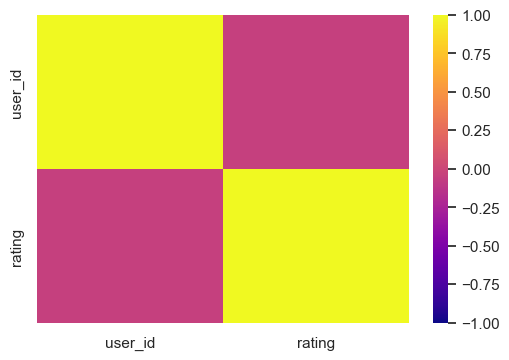

In [221]:
plt.figure(figsize=(6,4))
sns.heatmap(corel,
            vmin=-1,
            vmax=1,
            cmap='plasma')